In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import random
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotnine import *

import cv2
from IPython.display import HTML
from matplotlib import animation, rc
rc('animation', html='jshtml')

import geopandas as gpd

In [2]:
shp_gdf = gpd.read_file('data/india_gis/India States/Indian_states.shp')
shp_gdf.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [3]:
df = pd.read_csv("data/ICRISAT-District Level Data.csv")
df = df.replace("Orissa", "Odisha")
df

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [4]:
df.columns

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

In [4]:
temp = []
states = []
for i,state in enumerate(df["State Name"].unique()):
    prod = df[df["State Name"] == state].groupby("Year")["RICE PRODUCTION (1000 tons)"].sum()

    if(len(prod) == 50):
        prod[1996] = prod.mean()
        prod[1995] = prod.mean()
        
    temp.append(np.array(prod))
    
temp = np.array(temp) 

In [5]:
stat_df = pd.DataFrame()
stat_df["state"] = states

for i in range(52):
    stat_df[str(1966 + i)] = temp[:,i]

In [6]:
stat_df.replace(-10.00, pd.NA, inplace=True)

for index, row in stat_df.iterrows():
    for column in stat_df.columns:
        if pd.isna(row[column]):
            stat_df.at[index, column] = stat_df.iloc[index][1:].mean()

In [7]:
plot_df = pd.merge(shp_gdf, stat_df, left_on='st_nm', right_on='state', how='outer')
plot_df.drop("state", axis=1, inplace=True)
plot_df.fillna(0, inplace=True)
plot_df.head()

,st_nm,geometry,1966,1967,1968,1969,1970,1971,1972,1973,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",3214.00,3323.00,2754.00,3085.60,3434.70,3853.70,3523.50,3862.80,...,8880.61,7569.10,7933.09,7744.17,6862.75,7993.45,8455.59,7518.29,8002.34,8461.34
2,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",1632.44,1787.51,1989.65,1775.57,1986.73,1894.56,2127.33,2085.43,...,4020.60,4436.79,5001.55,4691.42,5086.66,5163.03,5193.52,5094.54,5098.81,5255.40
4,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",946.67,2799.78,3075.40,2372.20,2928.66,3854.02,3253.81,2786.01,...,5340.41,3625.82,3112.65,8237.97,8322.02,6649.61,8241.64,6802.25,8238.77,8093.16


In [8]:
def plot_map(title,column,name,cmap,fontsize,fontweight):
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.axis('off')
    ax.set_title(title,fontdict={'fontsize': fontsize, 'fontweight' : fontweight})
    plot_df.plot(column = column, cmap=cmap, linewidth=0.5, ax=ax, edgecolor='tab:blue',legend=True,vmin = 0,vmax=20000)
    plt.savefig(name)
    plt.tight_layout()
    plt.close(1)
    # plt.show()

In [9]:
cmap = 'Blues'
fontsize = '15'
fontweight = '3'

for i in tqdm(range(1966,2018)):
    plot_map(f'Rice Production (1000 Tons) ({i})',f'{i}',f'plots/rice/{i}.jpg',cmap,fontsize,fontweight)

  0%|          | 0/52 [00:00<?, ?it/s]

100%|██████████| 52/52 [00:19<00:00,  2.65it/s]


In [10]:
def create_animation(ims):
    fig=plt.figure(figsize=(10,10))
    plt.axis('off')
    im=plt.imshow(cv2.cvtColor(ims[0],cv2.COLOR_BGR2RGB))
    
    def animate_func(i):
        im.set_array(cv2.cvtColor(ims[i],cv2.COLOR_BGR2RGB))
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=500)

In [11]:
imgdir1 ='plots/rice/' 
paths0=[]
for dirname, _, filenames in os.walk(imgdir1):
    for filename in filenames:
        if filename not in ['__notebook_source__.ipynb','__notebook__.ipynb']:
            # print(filename)
            paths0+=[os.path.join(dirname, filename)]     
paths0 = sorted(paths0)
images0=[]
for i in tqdm(range(0,len(paths0))):
    images0+=[cv2.imread(paths0[i])]

100%|██████████| 52/52 [00:00<00:00, 668.62it/s]


In [12]:
anim = create_animation(np.array(images0))
plt.close(1)

In [13]:
html_code = anim.to_html5_video()
modified_html_code = html_code.replace('<video ', '<video width="800" height="800" ')
HTML(modified_html_code)

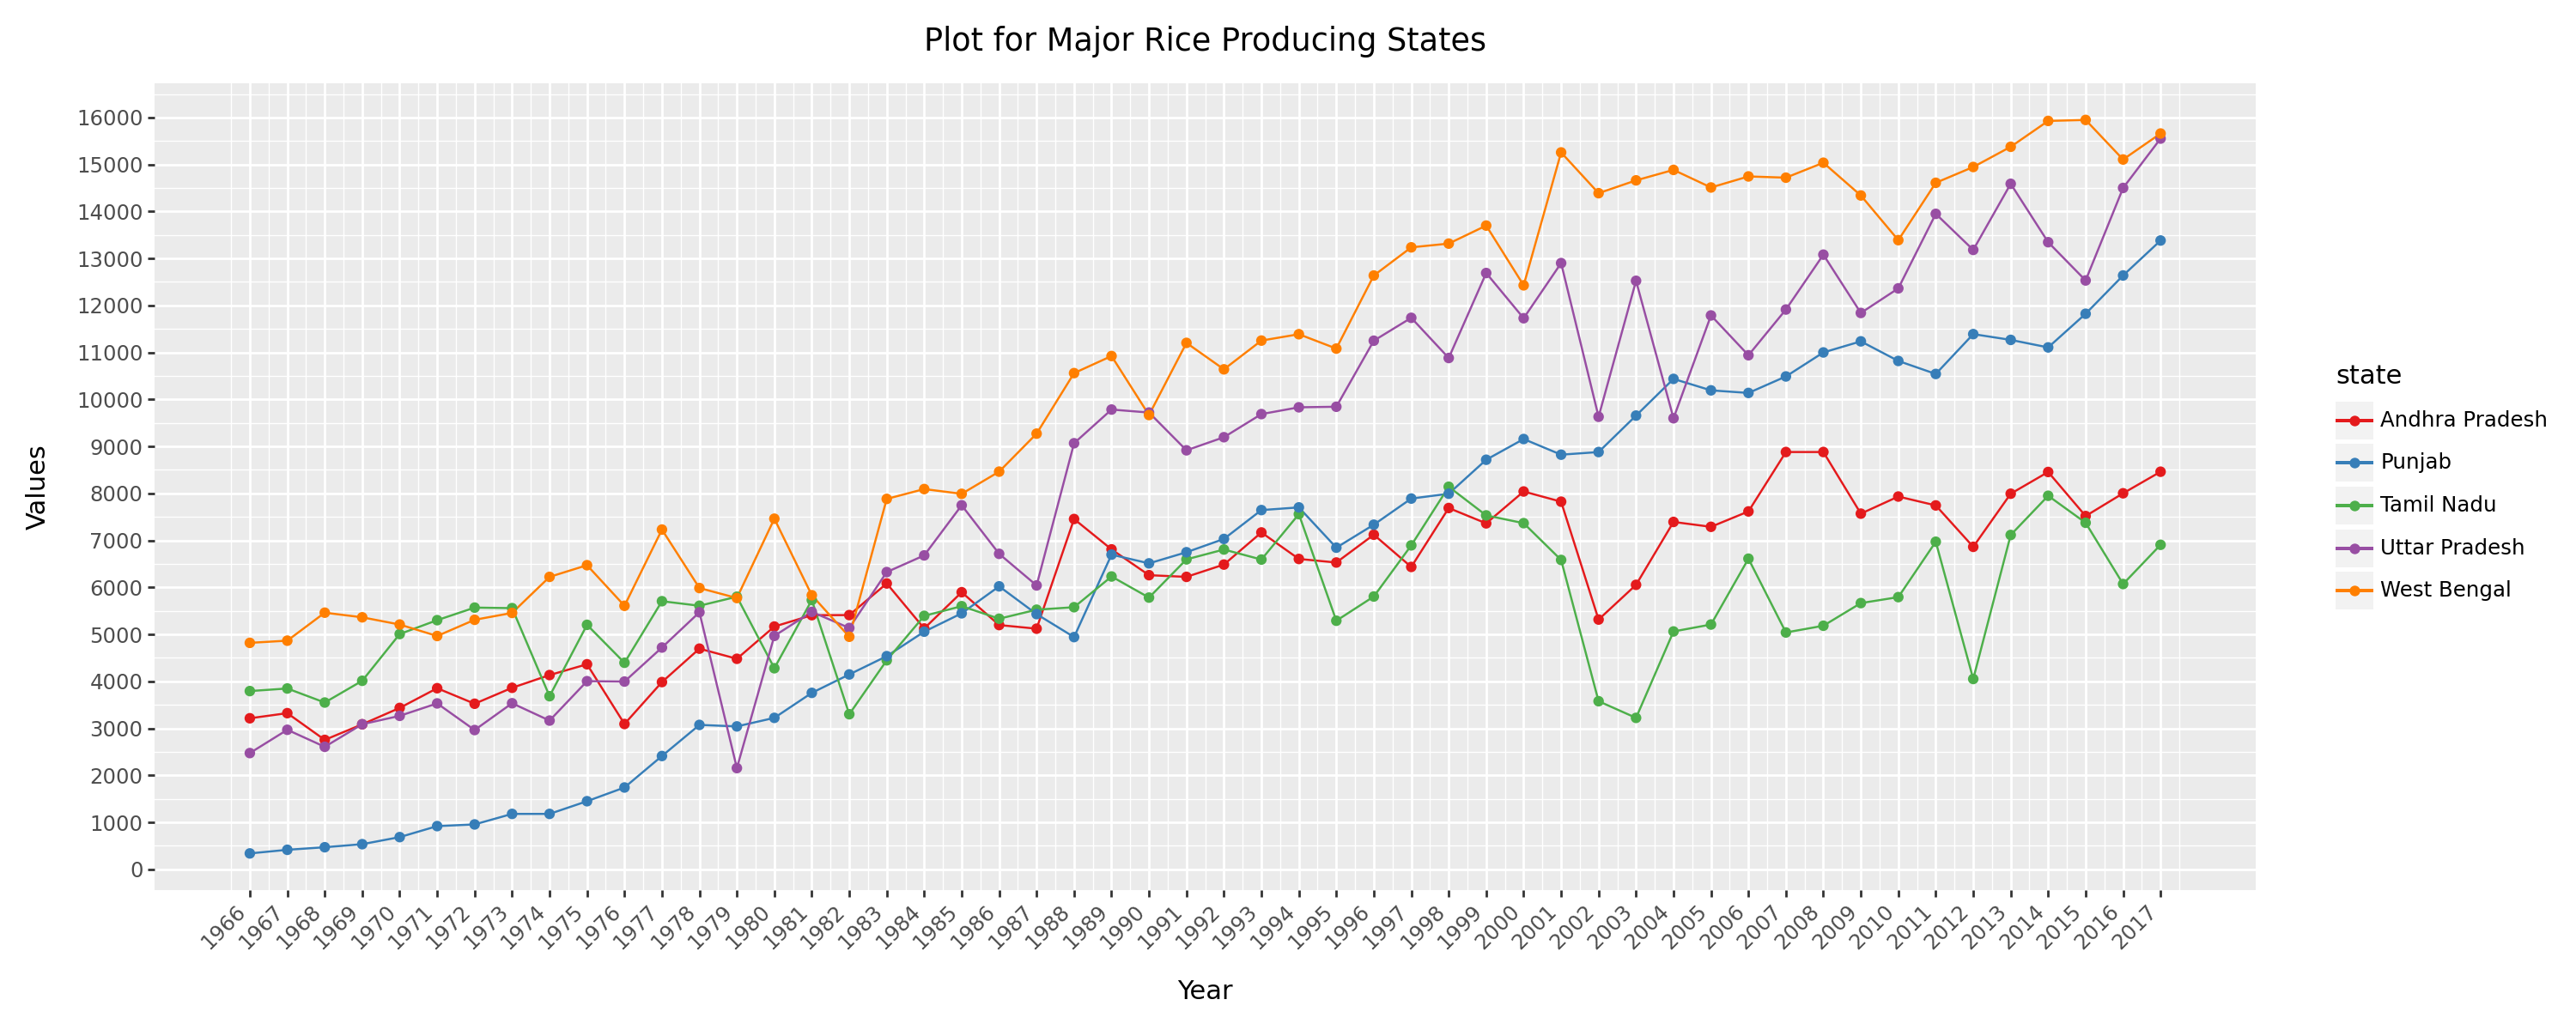

In [14]:
temp = stat_df.iloc[:,1:].mean(axis=1).values
top_st = stat_df["state"].iloc[np.argsort(temp)[::-1][:5]].values

plt_df = stat_df[stat_df["state"].isin(top_st)]
plt_df = plt_df.melt(id_vars='state')
plt_df['value'] = plt_df['value'].astype(float)
plt_df['variable'] = plt_df['variable'].astype(int)

(
    ggplot(plt_df, aes(x='variable', y='value', color='state')) +
    geom_line() +
    geom_point() +
    labs(x="Year", y="Values", title="Plot for Major Rice Producing States") +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    scale_color_brewer(type='qual', palette='Set1') +
    theme(figure_size=(15, 6)) +
    scale_y_continuous(breaks=range(0, int(plt_df['value'].max()) + 1000, 1000)) +
    scale_x_continuous(breaks=range(1966, 2018))
)